# Robustness to small sample sizes

In [1]:
require('cowplot')
library('ggplot2')
source(file.path('..','commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..','commons','multiplot.R'))
source(file.path('..','commons','plot_lib.R'))
source(file.path('..', 'commons','prepare_data.R'))
source(file.path('..', 'commons','plot_unit_mismatch.R'))
source(file.path('..', 'commons','plot_blandaldman_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## One-sample tests

### Load data from CSV

In [2]:
allsimudat_k05 <- load_data_from_csv('^test1_k005.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k25_n20 <- load_data_from_csv('^test1_k025_n20.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k50 <- load_data_from_csv('^test1_k050.*', '/Volumes/camille/IBMA_simu/')
allsimudat_k25_n100 <- load_data_from_csv('^test1_k025_n100_.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k005.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k050.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv"


In [3]:
allsimudat <- rbind(
                    allsimudat_k05, 
                    allsimudat_k25_n20, 
                    allsimudat_k25_n100,
                    allsimudat_k50
)

### Figure

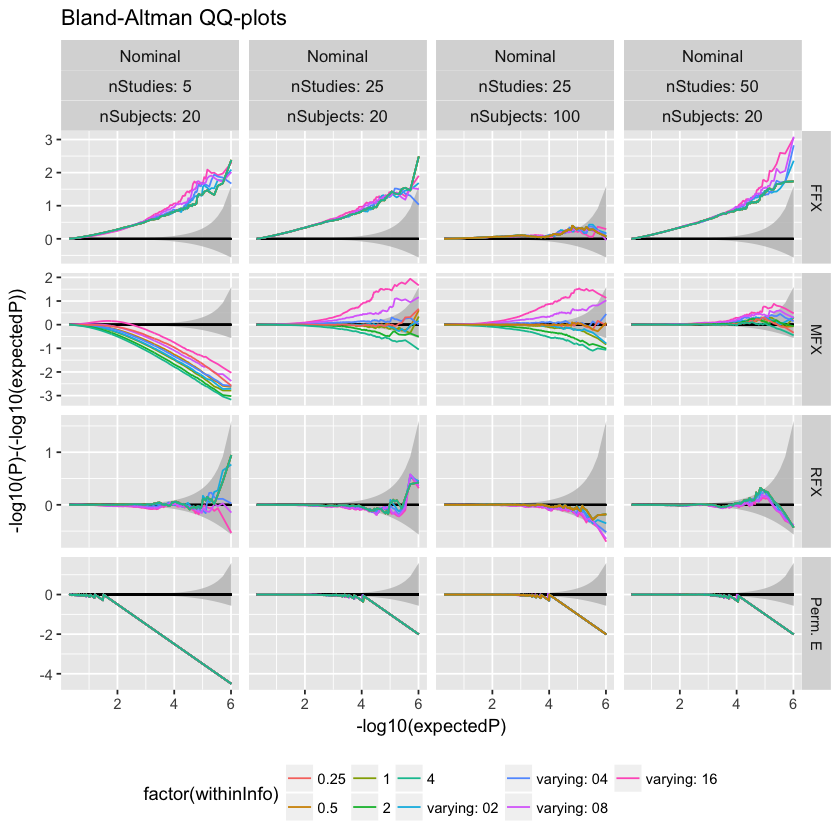

In [4]:
con_methods <- c("megaMFX","megaMFX2","megaRFX","permutCon", "megaFFX_FSL")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1)  |
     (methods %in% c("megaMFX2") & Between==1)  |
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

# plot_unit_mismatch(
#     subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
#     'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)

## Two-sample tests

### Load data from CSV

In [6]:
allsimudat2_k05 <- load_data_from_csv('^test2_k005.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k25_n20 <- load_data_from_csv('^test2_k025_n20.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k50 <- load_data_from_csv('^test2_k050.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_k25_n100 <- load_data_from_csv('^test2_k025_n100_.*', '/Volumes/camille/IBMA_simu/')

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k005.csv"
[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k025_n20.csv"
[1] "pattern= test2_k050"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k050.csv  not found, reprocessing the data."
[1] "^test2_k050.*"
[1] "19 simulations"
[1] "Reading  19  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft50_002/simu_400.csv"
[1] "/!  /Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft50_002/simu_400.csv does not exist."
[1] "Reading  18  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft20_002/simu_400.csv"
[1] "/!  /Volumes/camille/IBMA_simu//test2_k050_n20_btw0_wthdiff04_datascl_soft20_002/simu_400.csv does not exist."
[1] "Reading  17  /  19"
[1] "/Volumes/camille/IBMA_simu//test2_k050_n20_btw0

Warning message in file(file, "rt"):
“cannot open file '/Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test2_k050.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
allsimudat2 <- rbind(
                    allsimudat2_k05, 
                    allsimudat2_k25_n20, 
                    allsimudat2_k25_n100,
                    allsimudat2_k50
)

In [ ]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==0) | 
     (methods %in% c("stouffers") & Between==0)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==0) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [ ]:
z_methods <- c("fishers", "stouffers", "stouffersMFX", "weightedZ", "permutZ")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% z_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("fishers") & Between==1) | 
     (methods %in% c("stouffers") & Between==1)  |
     (methods %in% c("stouffersMFX") & Between==1)  |
     (methods %in% c("weightedZ") & Between==1) |
     (methods %in% c("permutZ") & Between==1)
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

In [ ]:
unique(allsimudat$methods)